<a href="https://colab.research.google.com/github/skorov48/Visualization-with-Seaborn/blob/main/Visualization_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация с Seaborn

Matplotlib оказался невероятно полезным и популярным инструментом визуализации, но даже заядлые пользователи признают, что он часто оставляет желать лучшего. Есть несколько обоснованных жалоб на Matplotlib, которые часто возникают:

До версии 2.0 настройки Matplotlib по умолчанию не были лучшим выбором. Он был основан на MATLAB примерно 1999 года, и это часто видно.
API Matplotlib относительно низкого уровня. Сложная статистическая визуализация возможна, но часто требует большого количества шаблонного кода.
Matplotlib появился раньше Pandas более чем на десятилетие, и поэтому не предназначен для использования с Pandas DataFrames. Чтобы визуализировать данные из Pandas DataFrame, необходимо извлечь каждый из них Seriesи часто объединять их в нужный формат. Было бы лучше иметь библиотеку построения графиков, которая может разумно использовать DataFrameметки на графике.
Решением этих проблем является Seaborn . Seaborn предоставляет API поверх Matplotlib, который предлагает разумный выбор стилей графиков и цветов по умолчанию, определяет простые высокоуровневые функции для распространенных типов статистических графиков и интегрируется с функциональностью, предоставляемой Pandas DataFrame.

Справедливости ради, команда Matplotlib решает эту проблему: недавно она добавила plt.styleинструменты, обсуждаемые в разделе Настройка Matplotlib: конфигурации и таблицы стилей , и начинает обрабатывать данные Pandas более гладко. Версия 2.0 библиотеки будет включать новую таблицу стилей по умолчанию, которая улучшит текущий статус-кво. Но по всем причинам, которые только что обсуждались, Seaborn остается чрезвычайно полезным дополнением.




# Seaborn против Matplotlib
Вот пример простого графика случайного блуждания в Matplotlib, использующего его классическое форматирование и цвета. Начнем с типичного импорта:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Теперь создадим некоторые случайные данные:

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(55, 100, 400)
y = np.cumsum(rng.randn(400, 10), 0)

И сделаем простой график:

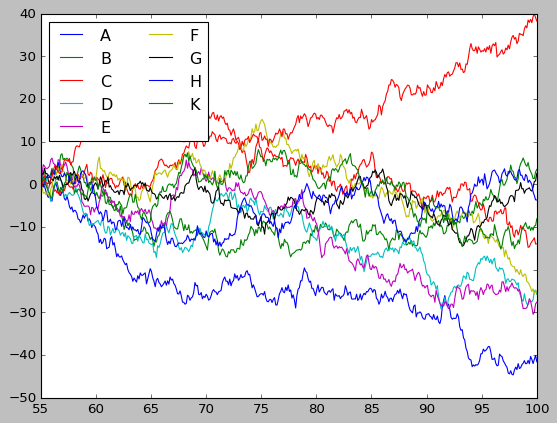

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEFGHK', ncol=2, loc='upper left');

Хотя результат содержит всю информацию, которую мы хотели бы передать, он сделан не слишком эстетично и даже выглядит немного старомодно в контексте визуализации данных XXI века.

Теперь давайте посмотрим, как это работает с Seaborn. Как мы увидим, Seaborn имеет много собственных высокоуровневых процедур построения графиков, но он также может перезаписывать параметры Matplotlib по умолчанию и, в свою очередь, заставлять даже простые скрипты Matplotlib выдавать значительно более качественный вывод. Мы можем задать стиль, вызвав set()метод Seaborn. По соглашению Seaborn импортируется как sns:

In [ ]:
import seaborn as sns
sns.set()

Теперь давайте повторим те же две строки, что и раньше:

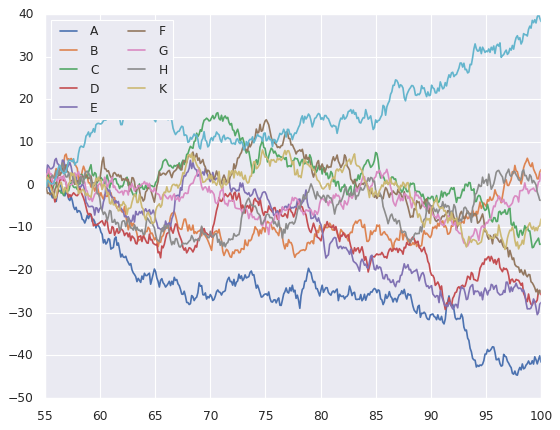

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEFGHK', ncol=2, loc='upper left');

# Изучение участков Сиборн
Основная идея Seaborn заключается в том, что он предоставляет высокоуровневые команды для создания различных типов графиков, полезных для статистического исследования данных и даже для некоторой подгонки статистических моделей.

Давайте рассмотрим несколько наборов данных и типов графиков, доступных в Seaborn. Обратите внимание, что все нижеследующее можно сделать с помощью сырых команд Matplotlib (это, по сути, то, что Seaborn делает под капотом), но API Seaborn гораздо удобнее.

# Гистограммы, KDE и плотности
Часто при визуализации статистических данных все, что вам нужно, это построить гистограммы и совместные распределения переменных. Мы увидели, что это относительно просто в Matplotlib:

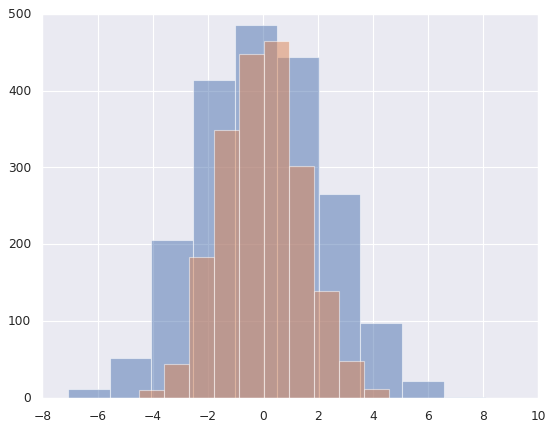

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Вместо гистограммы мы можем получить сглаженную оценку распределения, используя оценку плотности ядра, которую Сиборн делает с помощью sns.kdeplot:

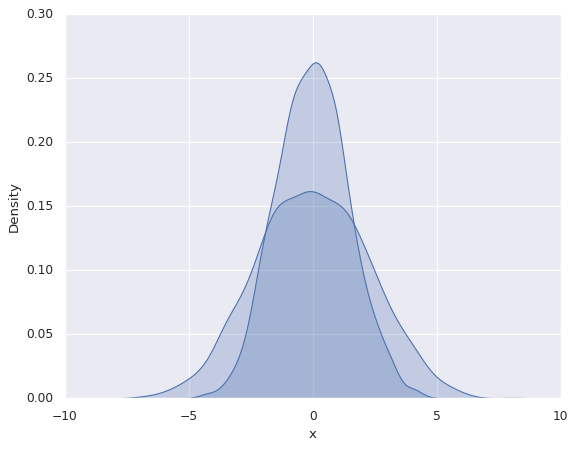

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Гистограммы и KDE можно объединить с помощью histplot:

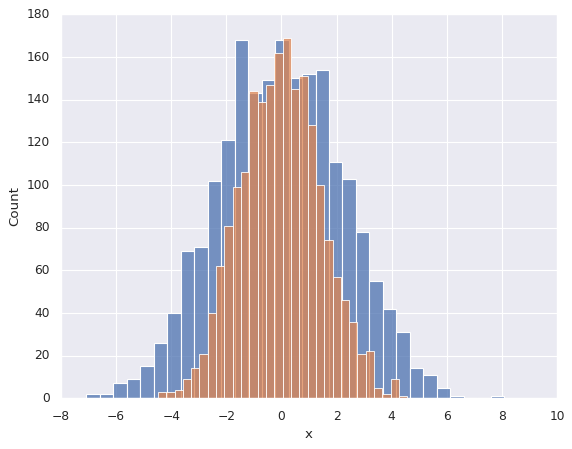

In [ ]:
sns.histplot(data['x'])
sns.histplot(data['y']);

Если мы передадим полный двумерный набор данных в kdeplot, мы получим двумерную визуализацию данных:

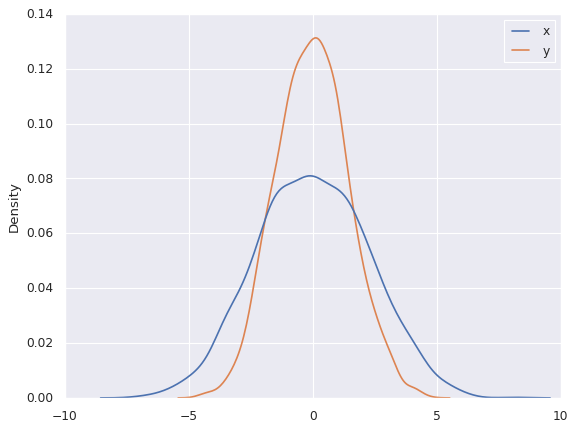

In [ ]:
sns.kdeplot(data);

Мы можем увидеть совместное распределение и маргинальные распределения вместе, используя sns.jointplot. Для этого графика мы установим стиль на белый фон:

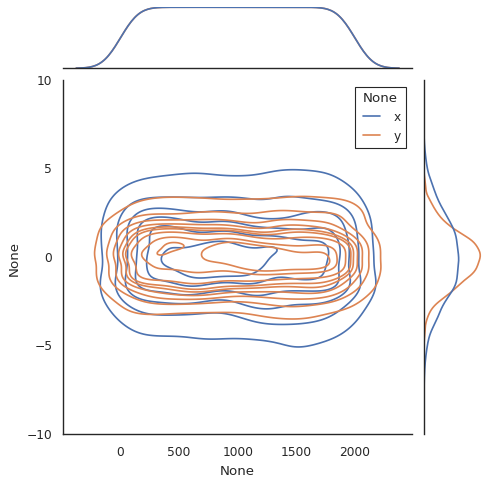

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data, kind='kde');

# Парные участки
При обобщении совместных графиков на наборы данных большего размера вы получаете парные графики . Это очень полезно для изучения корреляций между многомерными данными, когда вы хотите построить график всех пар значений относительно друг друга.

Мы продемонстрируем это на примере известного набора данных Iris, в котором приведены размеры лепестков и чашелистиков трех видов ирисов:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


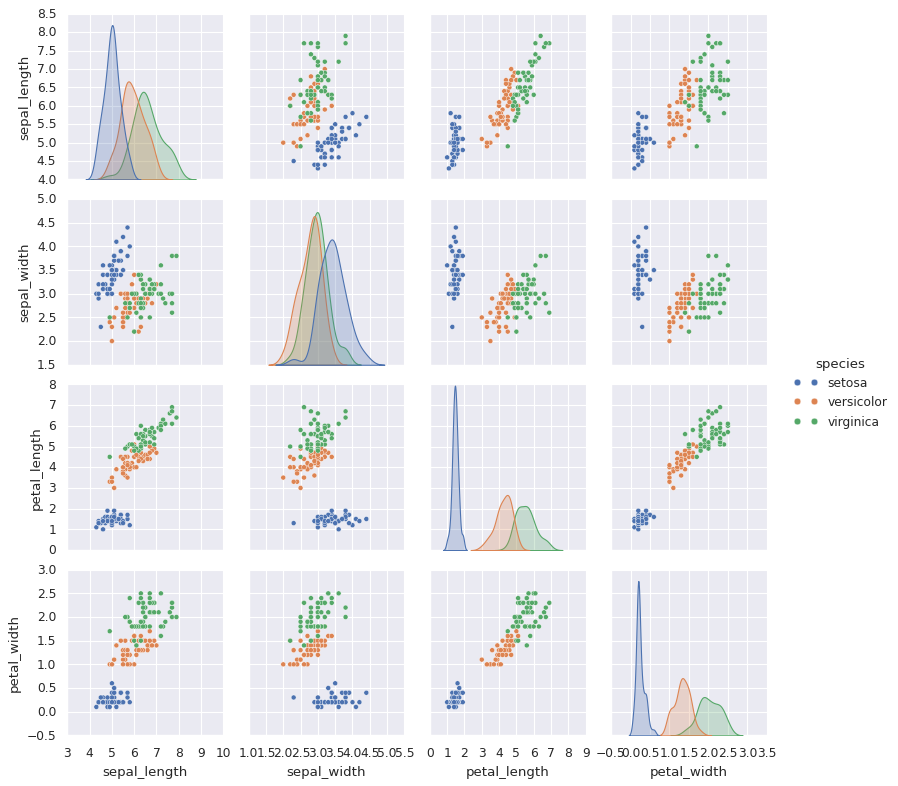

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

# Фасетные гистограммы
Иногда лучший способ просмотра данных — гистограммы подмножеств. Seaborn FacetGridделает это чрезвычайно простым. Мы рассмотрим некоторые данные, которые показывают сумму, которую персонал ресторана получает в виде чаевых, на основе различных показателей:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


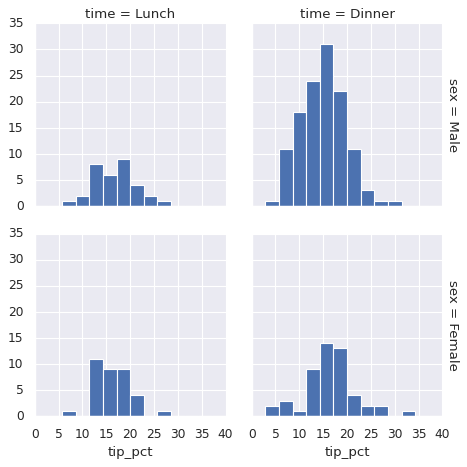

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

# Факторные графики
Факторные графики также могут быть полезны для такого рода визуализации. Это позволяет вам просматривать распределение параметра в пределах интервалов, определенных любым другим параметром:



In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

AttributeError: module 'seaborn' has no attribute 'factorplot'

# Совместные распределения
Подобно парному графику, который мы рассматривали ранее, мы можем использовать его sns.jointplotдля отображения совместного распределения между различными наборами данных, а также связанных с ними предельных распределений:

In [ ]:
data = pd.read_csv('marathon-data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'marathon-data.csv'